In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv("C:/Users/dany_/OneDrive/Escritorio/ejercicio.csv")

In [3]:
data.head()

,Y,X
0,28,26
1,37,32
2,36,35
3,30,27
4,28,25


In [4]:
lm = smf.ols(formula="Y~X", data = data).fit()

In [5]:
lm.summary()

C:\Users\dany_\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     25.89
Date:                Mon, 09 May 2022   Prob (F-statistic):            0.00381
Time:                        00:44:43   Log-Likelihood:                -12.754
No. Observations:                   7   AIC:                             29.51
Df Residuals:                       5   BIC:                             29.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7794      5.949      0.467      0.660     -12.512      18.071
X              1.0221      0.201      5.088      0.004       0.506       1.538
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.104
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.579
Skew:                          -0.353   Prob(JB):                        0.749
Kurtosis:                       1.780   Cond. No.                         264.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
sales_pred = lm.predict(pd.DataFrame(data["X"]))

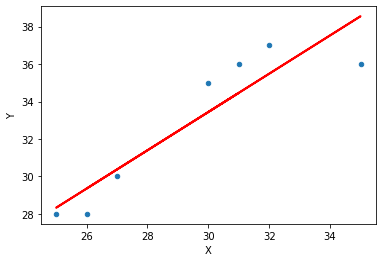

In [7]:
data.plot(kind = "scatter", x = "X", y ="Y")
plt.plot(pd.DataFrame(data["X"]), sales_pred, c="red", linewidth = 2)

In [8]:
alpha = .975
teorica = scipy.stats.t.ppf(q=alpha,df=lm.df_resid)
teorica

2.5705818366147395

In [9]:
tcalculada = lm.tvalues["X"]
tcalculada

5.088469525509051

In [10]:
if tcalculada > teorica:
    print("Se rechaza la hipotesis nula")

Se rechaza la hipotesis nula


In [11]:
t5 = scipy.stats.t.ppf(q=.95,df=lm.df_resid)
t5

2.015048372669157

In [12]:
b1 = lm.params["X"]
b1

1.0220588235294115

In [13]:
error = lm.bse["X"]
error


0.20085780575194945

In [14]:
li = b1 - t5 * error
li

0.617320628911048

In [15]:
ls = b1 + t5 * error
ls

1.426797018147775

In [16]:
semana33 = lm.params["Intercept"] + lm.params["X"] * 33
semana33

36.50735294117647